In [ ]:
#within 1 hour, 3 hours, 6 hours, 1 day, 2 days, 4 days, 1 week, 2 week, 3 week delay.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 


In [5]:
remove_large_ellipse = 180 # parameter in minute: remove large ellipses longer than 3 hours

In [6]:
def compute_frequency_excludinglarge_ellipse(df1):
    df1['Person1_t_start'] = pd.to_datetime(df1['Person1_t_start'])
    df1['Person1_t_end'] = pd.to_datetime(df1['Person1_t_end'])
    df1['Person2_t_start'] = pd.to_datetime(df1['Person2_t_start'])
    df1['Person2_t_end'] = pd.to_datetime(df1['Person2_t_end'])
    
    df1['timediff1'] = df1['Person1_t_end'] - df1['Person1_t_start']
    df1['timediff1'] = df1['timediff1'].dt.total_seconds()/60
    df1['timediff2'] = df1['Person2_t_end'] - df1['Person2_t_start']
    df1['timediff2'] = df1['timediff2'].dt.total_seconds()/60
    
    df1_new =df1[(df1['timediff1']<=remove_large_ellipse)&(df1['timediff2']<=remove_large_ellipse)]
    return df1_new

#  interaction frequency between tiger 22901 and tiger 22904

[2, 4, 25, 36, 221, 466, 929, 1581, 3794, 3156, 2673, 2588]


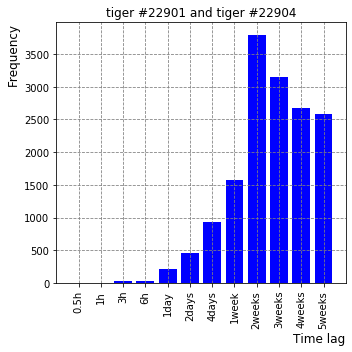

In [47]:
fileloop = ['30','60','180','360','1440','2880','5760','10080','20160','30240','40320','50400']
filenote = ['0.5h','1h','3h','6h','1day','2days','4days','1week','2weeks','3weeks','4weeks','5weeks']

frequencyl = []
for item in fileloop:
    data1 = pd.read_csv("data_generated/tiger_interaction_pairs_"+item+"min.csv", header=0, error_bad_lines=False, sep=',')
    newdata1 = compute_frequency_excludinglarge_ellipse(data1)
    newdata1 = newdata1.drop_duplicates(keep="last")
    frequencyl.append(newdata1.shape[0])

newfreq1 = []
for i,item in enumerate(frequencyl):
    if i == len(frequencyl)-1:break
    if i == 0 :
        newfreq1.append(item)
    newfreq1.append(frequencyl[i+1] - item)
print (newfreq1)
fig, ax1 = plt.subplots(figsize=(5,5))
plt.bar(filenote,newfreq1,align='center',color='b') # A bar chart
plt.xlabel('Time lag',horizontalalignment='right', x=1.0,fontsize=12)
plt.ylabel('Frequency',horizontalalignment='right', y=1.0,fontsize=12)
plt.xticks(rotation='vertical')
# matplotlib.rc('xtick', labelsize=12) 
# matplotlib.rc('ytick', labelsize=12) 
plt.title('tiger #22901 and tiger #22904')
fig.tight_layout()
ax1.grid(linestyle='--')
# fig.savefig("histogram_tiger22901_tiger22904.png", bbox_inches='tight',dpi=300)
plt.show()

# interaction frequency between tiger 20080 and tiger 20083

[8, 12, 33, 46, 201, 211, 139, 103, 358, 536, 273, 378]


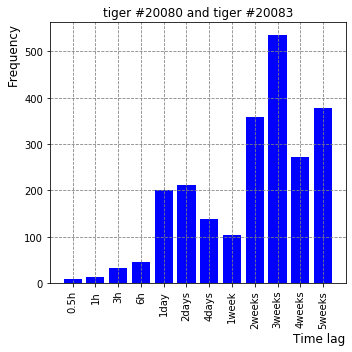

In [49]:
fileloop = ['30','60','180','360','1440','2880','5760','10080','20160','30240','40320','50400']
filenote = ['0.5h','1h','3h','6h','1day','2days','4days','1week','2weeks','3weeks','4weeks','5weeks']

frequencyl = []
for item in fileloop:
    data1 = pd.read_csv("data_generated/tiger20080_20083_"+item+"min.csv", header=0, error_bad_lines=False, sep=',')
    newdata1 = compute_frequency_excludinglarge_ellipse(data1)
    newdata1 = newdata1.drop_duplicates(keep="last")
    frequencyl.append(newdata1.shape[0])

newfreq1 = []
for i,item in enumerate(frequencyl):
    if i == len(frequencyl)-1:break
    if i == 0 :
        newfreq1.append(item)
    newfreq1.append(frequencyl[i+1] - item)
print (newfreq1)
fig, ax1 = plt.subplots(figsize=(5,5))
plt.bar(filenote,newfreq1,align='center',color='b') # A bar chart
plt.xlabel('Time lag',horizontalalignment='right', x=1.0,fontsize=12)
plt.ylabel('Frequency',horizontalalignment='right', y=1.0,fontsize=12)
plt.xticks(rotation='vertical')
# matplotlib.rc('xtick', labelsize=12) 
# matplotlib.rc('ytick', labelsize=12) 
plt.title('tiger #20080 and tiger #20083')
fig.tight_layout()
ax1.grid(linestyle='--')
# fig.savefig("histogram_tiger20080_tiger20083.png", bbox_inches='tight',dpi=300)
plt.show()

#  interaction frequency between  leopard 31898 and tiger 22901

[0, 0, 0, 2, 3, 1, 0, 3, 0, 53]
[23, 13, 39, 32, 34, 77, 61, 58, 55, 372]
[0, 0, 0, 2, 5, 6, 6, 9, 9, 62]
[23, 36, 75, 107, 141, 218, 279, 337, 392, 764]


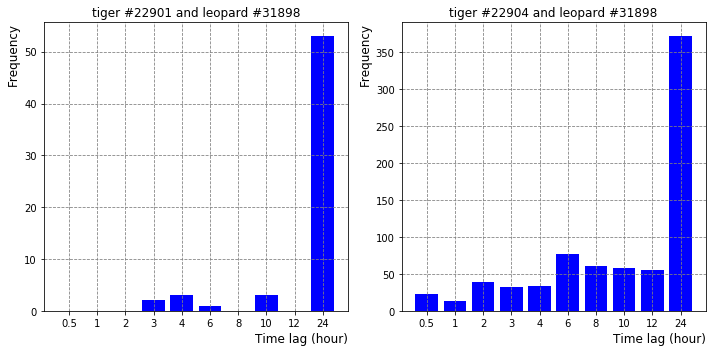

In [51]:
filenote = ['0.5','1','2','3','4','6','8','10','12','24']

frequency_leopard31898tiger22901 = []
for item in filenote:
    fname = int(float(item)*60)
    data1 = pd.read_csv("data_generated/leopard31898tiger22901_interaction_"+str(fname)+"min.csv", header=0, error_bad_lines=False, sep=',')
    newdata1 = compute_frequency_excludinglarge_ellipse(data1)
    frequency_leopard31898tiger22901.append(newdata1.shape[0])

frequency_leopard31898tiger22904 = []
for item in filenote:
    fname = int(float(item)*60)
    data1 = pd.read_csv("data_generated/leopard31898tiger22904_interaction_"+str(fname)+"min.csv", header=0, error_bad_lines=False, sep=',')
    newdata1 = compute_frequency_excludinglarge_ellipse(data1)
    frequency_leopard31898tiger22904.append(newdata1.shape[0])

newfreqleopard31898tiger22901 = []
for i,item in enumerate(frequency_leopard31898tiger22901):
    if i == len(frequency_leopard31898tiger22901)-1:break
    if i == 0 :
        newfreqleopard31898tiger22901.append(item)
    newfreqleopard31898tiger22901.append(frequency_leopard31898tiger22901[i+1] - item)
print (newfreqleopard31898tiger22901)

newfreqleopard31898tiger22904 = []
for i,item in enumerate(frequency_leopard31898tiger22904):
    if i == len(frequency_leopard31898tiger22904)-1:break
    if i == 0 :
        newfreqleopard31898tiger22904.append(item)
    newfreqleopard31898tiger22904.append(frequency_leopard31898tiger22904[i+1] - item)
print (newfreqleopard31898tiger22904)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.bar(filenote,newfreqleopard31898tiger22901,align='center',color='b') # A bar chart
ax1.set_xlabel('Time lag (hour)',horizontalalignment='right', x=1.0,fontsize=12)
ax1.set_ylabel('Frequency',horizontalalignment='right', y=1.0,fontsize=12)
ax1.set_title('tiger #22901 and leopard #31898')

ax2.bar(filenote,newfreqleopard31898tiger22904,align='center',color='b') # A bar chart
ax2.set_xlabel('Time lag (hour)',horizontalalignment='right', x=1.0,fontsize=12)
ax2.set_title('tiger #22904 and leopard #31898')
ax2.set_ylabel('Frequency',horizontalalignment='right', y=1.0,fontsize=12)
# # matplotlib.rc('xtick', labelsize=12) 
# # matplotlib.rc('ytick', labelsize=12) 
# plt.title('leopard 31898 and tiger 22901')
fig.tight_layout()
ax1.grid(linestyle='--')
ax2.grid(linestyle='--')
print (frequency_leopard31898tiger22901)
print (frequency_leopard31898tiger22904)
fig.savefig("data_generated/histogram_leopard31898_tiger22901_tiger22904.png", bbox_inches='tight',dpi=300)
plt.show()

# interaction frequency between leopard 31898 and tiger 22904 

In [110]:
# fileloop = ['30','60','360','1440']
# filenote = ['0.5h','1h','6h','24h']

# frequencyl = []
# for item in fileloop:
#     data1 = pd.read_csv("data_generated/leopard31898tiger22904_interaction_"+item+"min.csv", header=0, error_bad_lines=False, sep=',')
#     newdata1 = compute_frequency_excludinglarge_ellipse(data1)
#     frequencyl.append(newdata1.shape[0])
# frequencyl

# fig, ax1 = plt.subplots(figsize=(5,5))
# plt.bar(filenote,frequencyl,align='center',color='b') # A bar chart
# plt.xlabel('Time lag (hour)',horizontalalignment='right', x=1.0,fontsize=12)
# plt.ylabel('Frequency',horizontalalignment='right', y=1.0,fontsize=12)
# # matplotlib.rc('xtick', labelsize=12) 
# # matplotlib.rc('ytick', labelsize=12) 
# plt.title('leopard 31898 and tiger 22904')
# # fig.savefig("leopard31898_tiger22901_tiger22904.pdf", bbox_inches='tight',dpi=300)
# plt.show()

# create direct interaction network for the three animals

In [92]:
delayPam = '30'

In [93]:
df2tigers = pd.read_csv("data_generated/tiger_interaction_pairs_"+delayPam+"min.csv", header=0, error_bad_lines=False, sep=',')
leopard31898tiger22901 = pd.read_csv("data_generated/leopard31898tiger22901_interaction_"+delayPam+"min.csv", header=0, error_bad_lines=False, sep=',')
leopard31898tiger22904 = pd.read_csv("data_generated/leopard31898tiger22904_interaction_"+delayPam+"min.csv", header=0, error_bad_lines=False, sep=',')

df2tigers = compute_frequency_excludinglarge_ellipse(df2tigers)
leopard31898tiger22901 = compute_frequency_excludinglarge_ellipse(leopard31898tiger22901)
leopard31898tiger22904 = compute_frequency_excludinglarge_ellipse(leopard31898tiger22904)

df2tigers['count'] = 1 
df2tigersnew = df2tigers.groupby(['Person1','Person2']).sum().reset_index() # still directed graph so far

leopard31898tiger22901['count'] = 1 
leopard31898tiger22901new = leopard31898tiger22901.groupby(['Person1','Person2']).sum().reset_index() # still directed graph so far

leopard31898tiger22904['count'] = 1 
leopard31898tiger22904new = leopard31898tiger22904.groupby(['Person1','Person2']).sum().reset_index() # still directed graph so far

dfall = df2tigersnew.append(leopard31898tiger22901new)
dfall = dfall.append(leopard31898tiger22904new)
dfall = dfall[['Person1','Person2','count']]
dfall['Person1'] = dfall['Person1'].astype('int')
dfall['Person2'] = dfall['Person2'].astype('int')
dfall

,Person1,Person2,count
0,22901,22904,2
0,22904,31898,23


In [94]:
import networkx as nx

G=nx.DiGraph()
G.clear()
for row in ['22901','22904','31898']:
    G.add_node(int(row))
for index, row in dfall.iterrows():
    G.add_edge(row['Person1'],row['Person2'], interactions=float(row['count']))  

    
UG = G.to_undirected() # convert to a undirected graph

# the edge weight is the count of interactions between two individuals (nodes)
# since the directed graph is symmetric we only count once the edge weight 
for node in G:
    for ngbr in nx.neighbors(G, node):
        if node in nx.neighbors(G, ngbr):
            UG.edges[node, ngbr]['interactions'] = (
                G.edges[node, ngbr]['interactions'] 
            )
UG.edges.data('interactions')
nx.write_gexf(UG, "data_generated/tiger_leopard_network_"+delayPam+"minDelay.gexf") # this is a gephi file which can be opended in Gephi and visualize the social network
